# CSE 6240 Homework 3 - Analyzing a Movie Review dataset

## Implementing Word2Vec

In [3]:
# Reading in the datsets

import numpy as np
import pandas as pd

# Read data from files 
train = pd.read_csv( "labeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )

# Word2Vec can learn from unlabeled data. Importing unlabeled train
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print ("Read %d labeled train reviews, %d labeled test reviews, and %d unlabeled reviews\n" % 
(train["review"].size, test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [4]:
# Cleaning and reducing the text
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

# Function to clean each review - stopwords might be useful for word2vec context so we will keep them

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review, "lxml").get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)


# word2vec expects the input to be list of lists
# Because word2vec will make sense out of the sentences, we need to split the paragraphs into sentences
# which we will further create into lists

# Download the punkt tokenizer for sentence splitting
import nltk.data
#nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words

    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())

    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, remove_stopwords ))

    # Return the list of sentences (each sentence is a list of words, so this returns a list of lists
    return sentences

In [5]:
# Preparing the data
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print ("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)
    
print("Length of the sentences list: ", len(sentences))

Parsing sentences from training set


/home/arjun/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/home/arjun/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Parsing sentences from unlabeled set


/home/arjun/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/arjun/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/arjun/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like r

Length of the sentences list:  795538


### Implementing the word2vec model on our dataset

In [8]:
# Implementing word2vec

# Import the built-in logging module and configure it so that Word2Vec creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count - to be considered, word has to have this much freq                      
num_workers = 10       # Number of threads to run in parallel
context = 5         # Context window size

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training the word2vec model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context)

model.init_sims(replace=True)

2017-04-19 22:51:24,020 : INFO : collecting all words and their counts
2017-04-19 22:51:24,021 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-19 22:51:24,089 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2017-04-19 22:51:24,162 : INFO : PROGRESS: at sentence #20000, processed 451887 words, keeping 24948 word types
2017-04-19 22:51:24,218 : INFO : PROGRESS: at sentence #30000, processed 671310 words, keeping 30034 word types


Training the word2vec model...


2017-04-19 22:51:24,282 : INFO : PROGRESS: at sentence #40000, processed 897810 words, keeping 34348 word types
2017-04-19 22:51:24,340 : INFO : PROGRESS: at sentence #50000, processed 1116958 words, keeping 37761 word types
2017-04-19 22:51:24,396 : INFO : PROGRESS: at sentence #60000, processed 1338399 words, keeping 40723 word types
2017-04-19 22:51:24,448 : INFO : PROGRESS: at sentence #70000, processed 1561573 words, keeping 43333 word types
2017-04-19 22:51:24,503 : INFO : PROGRESS: at sentence #80000, processed 1780880 words, keeping 45714 word types
2017-04-19 22:51:24,565 : INFO : PROGRESS: at sentence #90000, processed 2004989 words, keeping 48135 word types
2017-04-19 22:51:24,626 : INFO : PROGRESS: at sentence #100000, processed 2226945 words, keeping 50207 word types
2017-04-19 22:51:24,683 : INFO : PROGRESS: at sentence #110000, processed 2446559 words, keeping 52081 word types
2017-04-19 22:51:24,745 : INFO : PROGRESS: at sentence #120000, processed 2668754 words, keepin

### Obtaining the vector representation of our word2vec model

In [7]:
# Exploring the model
print("Shape of the model matrix:", model.wv.syn0.shape)

# The number of rows in syn0 is the number of words in the model's vocabulary, 
# and the number of columns corresponds to the size of the feature vector, which we set in Part 2.  
# Setting the minimum word count to 40 gave us a total vocabulary of 16,490 words with 100 features apiece

# The 100 features represent a type of behavioral, descriptive characteristic of the words. For example, royalty,
# human, work etc. It could be a mixture of these. The number of features also represents the number of neurons
# in the NN hidden layer. The vector values represent the relation of the word with its context words.

# The vector representation of the words in our dataset is simply:
Z1 = model.wv.syn0

Z1_names = model.wv.index2word


Shape of the model matrix: (16490, 100)


### Importing the Google word2vec model

In [7]:
from gensim.models import KeyedVectors
google_model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)


2017-04-18 19:03:43,912 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2017-04-18 19:04:26,917 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


### Obtaining vector representation of Google word2vec model for words in train with frequency >= 40

In [8]:
# Exploring the Google model

print("Shape of the Google model: ", google_model.syn0.shape)

# The google model already has vector representations of a lot of words (3 million). We need to extract
# the words that are in our train set. 

# Also, as we used the min_word_count of 40 in our word2vec model, we will only keep those words with atleast
# 40 occurences now. This will help us compare our model with the Google model.

word_list = [word for sublist in sentences for word in sublist]

from collections import defaultdict, Counter
word_dict = defaultdict(int)

for word in word_list:
    word_dict[word] += 1

tuple_list = [i for i in word_dict.items()]

final_words = []

for pair in tuple_list:
    if pair[1] >= 40:
        final_words.append(pair[0])
        
print("Length of the final words list: ", len(final_words), ". This is the same number as our word2vec model.")

# Finding the google vector representations of words in our final list
google_names = google_model.index2word

# Making a mask for google words in our final words list
mask = np.in1d(google_names, final_words)
print("Number of words from our dataset in the google model: ", sum(mask))

# Getting the Google model vector representation of words in mask
google_mat = google_model.syn0

Z2 = google_mat[mask, : ]

Z2_names = np.array(google_names)[mask]

Shape of the Google model:  (3000000, 300)
Length of the final words list:  16490 . This is the same number as our word2vec model.
Number of words from our dataset in the google model:  15181


### K-means clustering on the first matrix - Z1

In [9]:
from sklearn.cluster import KMeans

# Initialing the k-means model with 10 clusters
kmeans_clustering = KMeans( n_clusters = 10 )

Z1_kmeans = kmeans_clustering.fit(Z1)

# Getting the cluster center
Z1_centers = Z1_kmeans.cluster_centers_

# Assigning clusters to all the points
clust_num_Z1 = kmeans_clustering.fit_predict( Z1 )

print("Number of words in each cluster:", Counter(clust_num_Z1))

Number of words in each cluster: Counter({7: 2561, 2: 1984, 5: 1868, 0: 1677, 1: 1658, 3: 1649, 4: 1580, 9: 1499, 6: 1338, 8: 676})


### Getting a table of words in each cluster for our word2vec implementation

In [13]:
# Using distances from the centroid to get the top 20 words
from sklearn.metrics import pairwise
from operator import itemgetter
      
# Function to get the top 20 words for each cluster
      
def clust_words(matrix, matrix_names, matrix_centers, clust_assign, c_num):
    c_names = np.array(matrix_names)[clust_assign == c_num]
    c_points = matrix[clust_assign == c_num, :]
    
    c_dist = pairwise.pairwise_distances(c_points, Y = matrix_centers[c_num].reshape(1, -1), metric='euclidean').flatten()

    c_list = zip(c_names, c_dist)
    c_list = sorted(c_list, key = itemgetter(1))
    if len(c_list) > 20:
        name_list = [i[0] for i in c_list[:20]]
    else:
        name_list = [i[0] for i in c_list]
    
    return name_list


# Making a pandas table
top_words = defaultdict(int)

for i in np.unique(clust_num_Z1):
    top_words[("cluster " + str(i+1))] = clust_words(Z1, Z1_names, Z1_centers, clust_num_Z1, i)

pd.DataFrame(top_words)

,cluster 1,cluster 10,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9
0,compromise,performance,inferno,removal,colony,wasp,overwrought,betrayed,vocals,seduce
1,function,role,creepshow,organs,imperial,pawn,unexciting,informed,spelling,arrange
2,torment,grace,dynasty,frenzy,warsaw,toad,lacklustre,approached,mark,blackmail
3,divide,nomination,solaris,frenzied,headquarters,momentarily,incongruous,ridiculed,bots,assist
4,surrender,screenwriters,trinity,veins,colonies,attendant,ponderous,healed,editor,appease
5,manifest,actress,amicus,lenses,bureau,saloon,improbable,instructed,autobiography,reunite
6,exhibit,yea,scanners,grinding,armies,hulking,distasteful,proposed,standouts,reconcile
7,ridicule,actor,seminal,assault,refugees,gannon,unsubtle,manipulates,pairing,reclaim
8,contributing,nope,tarkovsky,diet,dictatorship,cub,underplayed,redeemed,miscasting,betray
9,willingness,director,canon,tattoos,miners,necklace,surrealistic,questioned,scoop,dispose


### K-means clustering on the second matrix - Z2

In [12]:
Z2_kmeans = kmeans_clustering.fit(Z2)

# Getting the cluster center
Z2_centers = Z2_kmeans.cluster_centers_

# Assigning clusters to all the points
clust_num_Z2 = kmeans_clustering.fit_predict( Z2 )

print("Number of words in each cluster:", Counter(clust_num_Z2))

Number of words in each cluster: Counter({2: 3407, 0: 1974, 7: 1934, 5: 1465, 9: 1394, 3: 1263, 8: 1153, 4: 1104, 1: 1016, 6: 471})


### Getting a table of words in each cluster for Google's word2vec implementation

In [14]:
# Using distances from the centroid to get the top 20 words

# Making a pandas table
top_words = defaultdict(int)

for i in np.unique(clust_num_Z2):
    top_words[("cluster " + str(i+1))] = clust_words(Z2, Z2_names, Z2_centers, clust_num_Z2, i)

pd.DataFrame(top_words)

,cluster 1,cluster 10,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9
0,vivian,oldman,yoda,greer,gaul,philo,gunga,is,darth,creepshow
1,sutherland,reiner,robocop,needn,anyway,rishi,wendell,seems,just,pixar
2,clarkson,jima,candyman,clooney,sort,surely,andromeda,likes,skywalker,danza
3,aishwarya,him,brokeback,jacqueline,ironically,truly,capra,turns,stiller,lila
4,kirsten,home,mallrats,buchanan,evidently,me,tyra,thinks,warners,moonstruck
5,yvonne,area,jabba,percy,merely,thinking,shahrukh,looks,when,conte
6,nicholson,she,posey,portman,unfortunately,seeming,dragonball,works,barkin,moog
7,olivier,someone,supergirl,corbett,too,phantasm,downey,comes,holm,cheezy
8,nicola,people,jezebel,gaston,sometimes,doubtless,claus,stands,ernest,risqu
9,vinod,young,carney,erika,admittedly,ness,blackie,does,last,undeniably


### Converting each review into a bag of centroids

In [15]:
# Defining the bag of centroids function

# Each review will be transformed into a vector of length 10, where elements represent the number of words in
# each cluster

# The function takes as input the words list in each review and a dictionary containing the words and their
# cluster numbers that we created in Z1 and Z2.

def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [16]:
# Creating the bag of centroids for Z1

# Getting the inputs to the function
# 1. - Wordlist

# We will remove the stopwords here as we don't want their weight to affect our review classification
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, remove_stopwords=True ))
    
# Z1 map

Z1_centroid_map = dict(zip(Z1_names, clust_num_Z1))

X1 = np.zeros((train["review"].size, len(np.unique((clust_num_Z1)))), dtype = "float32")

# Transform the training set reviews into bags of centroids for Z1
counter = 0
for review in clean_train_reviews:
    X1[counter] = create_bag_of_centroids( review, Z1_centroid_map )
    counter += 1
    
# Z2 map

Z2_centroid_map = dict(zip(Z2_names, clust_num_Z2))

X2 = np.zeros((train["review"].size, len(np.unique((clust_num_Z2)))), dtype = "float32")

# Transform the training set reviews into bags of centroids for Z2
counter = 0
for review in clean_train_reviews:
    X2[counter] = create_bag_of_centroids( review, Z2_centroid_map )
    counter += 1

### Creating the bag of centroids for the test set

In [83]:
# Creating the test dataset
clean_test_reviews = []

for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, remove_stopwords=True ))
    
# X1 - test
X1_test = np.zeros((test["review"].size, len(np.unique((clust_num_Z1)))), dtype = "float32")

# Transform the test set reviews into bags of centroids for Z1_test
counter = 0
for review in clean_test_reviews:
    X1_test[counter] = create_bag_of_centroids( review, Z1_centroid_map )
    counter += 1
    
# X2 - test
X2_test = np.zeros((test["review"].size, len(np.unique((clust_num_Z2)))), dtype = "float32")

# Transform the training set reviews into bags of centroids for Z2
counter = 0
for review in clean_test_reviews:
    X2_test[counter] = create_bag_of_centroids( review, Z2_centroid_map )
    counter += 1

### Thus we finally have X1, X2, X1_test and X2_test saved. We will use these later on.

## Topic Modeling

In [18]:
# We will first need a bag of words representation for our words. We create a corpus of the words for the train

from gensim import corpora

dictionary = corpora.Dictionary(clean_train_reviews)
corpus = [dictionary.doc2bow(text) for text in clean_train_reviews]

corpora.MmCorpus.serialize('./corpus.mm', corpus)


2017-04-18 19:18:50,521 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-04-18 19:18:52,159 : INFO : adding document #10000 to Dictionary(51372 unique tokens: ['stringy', 'handwritten', 'searing', 'madeline', 'exposure']...)
2017-04-18 19:18:53,709 : INFO : adding document #20000 to Dictionary(67659 unique tokens: ['stringy', 'handwritten', 'delicatessen', 'searing', 'madeline']...)
2017-04-18 19:18:54,473 : INFO : built Dictionary(74064 unique tokens: ['stringy', 'handwritten', 'delicatessen', 'helpfuls', 'searing']...) from 25000 documents (total 2987977 corpus positions)
2017-04-18 19:18:57,599 : INFO : storing corpus in Matrix Market format to ./corpus.mm
2017-04-18 19:18:57,603 : INFO : saving sparse matrix to ./corpus.mm
2017-04-18 19:18:57,604 : INFO : PROGRESS: saving document #0
2017-04-18 19:18:57,762 : INFO : PROGRESS: saving document #1000
2017-04-18 19:18:57,910 : INFO : PROGRESS: saving document #2000
2017-04-18 19:18:58,055 : INFO : PROGRESS: saving do

In [90]:
# Preparing the test corpus

dictionary_test = corpora.Dictionary(clean_test_reviews)
corpus_test = [dictionary.doc2bow(text) for text in clean_test_reviews]


2017-04-18 23:23:34,003 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-04-18 23:23:35,552 : INFO : adding document #10000 to Dictionary(50262 unique tokens: ['stringy', 'handwritten', 'delicatessen', 'deena', 'kirtanas']...)
2017-04-18 23:23:37,185 : INFO : adding document #20000 to Dictionary(66877 unique tokens: ['stringy', 'handwritten', 'delicatessen', 'deena', 'kirtanas']...)
2017-04-18 23:23:37,971 : INFO : built Dictionary(73273 unique tokens: ['stringy', 'handwritten', 'delicatessen', 'deena', 'kirtanas']...) from 25000 documents (total 2918687 corpus positions)


### Making the LDA models

In [20]:
mm = corpora.MmCorpus('corpus.mm')
print(mm)

2017-04-18 19:23:49,061 : INFO : loaded corpus index from corpus.mm.index
2017-04-18 19:23:49,062 : INFO : initializing corpus reader from corpus.mm
2017-04-18 19:23:49,064 : INFO : accepted corpus with 25000 documents, 74064 features, 2450302 non-zero entries


MmCorpus(25000 documents, 74064 features, 2450302 non-zero entries)


In [23]:
# Creating the first LDA model

from gensim.models import ldamodel
lda = ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=10, update_every=0, passes=10)

2017-04-18 19:29:52,312 : INFO : using symmetric alpha at 0.1
2017-04-18 19:29:52,314 : INFO : using symmetric eta at 1.3501836249729963e-05
2017-04-18 19:29:52,339 : INFO : using serial LDA version on this node
2017-04-18 19:30:01,036 : INFO : running batch LDA training, 10 topics, 10 passes over the supplied corpus of 25000 documents, updating model once every 25000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2017-04-18 19:30:01,573 : INFO : PROGRESS: pass 0, at document #2000/25000
2017-04-18 19:30:05,874 : INFO : PROGRESS: pass 0, at document #4000/25000
2017-04-18 19:30:10,178 : INFO : PROGRESS: pass 0, at document #6000/25000
2017-04-18 19:30:14,366 : INFO : PROGRESS: pass 0, at document #8000/25000
2017-04-18 19:30:18,442 : INFO : PROGRESS: pass 0, at document #10000/25000
2017-04-18 19:30:22,716 : INFO : PROGRESS: pass 0, at document #12000/25000
2017-04-18 19:30:26,878 : INFO : PROGRESS: pass 0, at document #14

In [51]:
# Function to vectorize the LDA model

def lda_featurization(lda_model , n_topics , corp):
    
    X = np.zeros(shape = (len(corp), n_topics))
    
    for i in range(len(corp)):
        doc_top = lda_model.get_document_topics(corp[i], minimum_probability=0)
        doc_top = [item[1] for item in doc_top]
        
        X[i,:] = doc_top
        
    return X

X3 = lda_featurization(lda, 10, corpus)
                     

In [82]:
# Now we also need the top 10 words for each topic
# Getting all the unique words in our dataset
flattened = set([val for sublist in clean_train_reviews for val in sublist])

word_ls = list()
word_prob = list()

for word in flattened:
    prob = dict(lda.get_term_topics(word, minimum_probability = 0))
    word_ls.append(word)
    word_prob.append(prob)
    
word_frame = pd.DataFrame(word_prob)
word_frame["Word"] = word_ls

# Getting the top words for each topic

top10 = defaultdict(str)

for i in range(10):
    tup_frame = word_frame[[i, "Word"]].dropna()
    tup_frame = list(tup_frame.sort_values(by = i, ascending = False)[:10]["Word"])
    top10["cluster" + str(i + 1)] = tup_frame

pd.DataFrame(top10)

,cluster1,cluster10,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9
0,film,like,movie,movie,film,movie,film,film,movie,film
1,movie,one,film,film,one,film,one,one,film,one
2,one,movie,one,one,horror,one,movie,films,one,like
3,like,film,love,like,like,like,good,would,good,movie
4,good,show,story,good,movie,time,like,like,like,story
5,show,time,great,even,would,life,see,movie,story,time
6,time,get,like,bad,much,also,story,good,much,see
7,story,people,life,really,films,best,time,really,really,character
8,life,really,get,would,even,good,films,people,well,well
9,great,even,good,see,time,get,first,well,characters,even


In [79]:
# Second LDA Model

lda_2 = ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=20, update_every=0, passes=20)

# Vectorizing the model

X4 = lda_featurization(lda_2, 20, corpus)


2017-04-18 22:10:20,097 : INFO : using symmetric alpha at 0.05
2017-04-18 22:10:20,099 : INFO : using symmetric eta at 1.3501836249729963e-05
2017-04-18 22:10:20,126 : INFO : using serial LDA version on this node
2017-04-18 22:10:39,240 : INFO : running batch LDA training, 20 topics, 20 passes over the supplied corpus of 25000 documents, updating model once every 25000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2017-04-18 22:10:39,755 : INFO : PROGRESS: pass 0, at document #2000/25000
2017-04-18 22:10:45,650 : INFO : PROGRESS: pass 0, at document #4000/25000
2017-04-18 22:10:51,518 : INFO : PROGRESS: pass 0, at document #6000/25000
2017-04-18 22:10:57,745 : INFO : PROGRESS: pass 0, at document #8000/25000
2017-04-18 22:11:03,389 : INFO : PROGRESS: pass 0, at document #10000/25000
2017-04-18 22:11:08,871 : INFO : PROGRESS: pass 0, at document #12000/25000
2017-04-18 22:11:14,359 : INFO : PROGRESS: pass 0, at document #1

In [81]:
word_ls = list()
word_prob = list()

for word in flattened:
    prob = dict(lda_2.get_term_topics(word, minimum_probability = 0))
    word_ls.append(word)
    word_prob.append(prob)
    
word_frame = pd.DataFrame(word_prob)
word_frame["Word"] = word_ls

# Getting the top words for each topic

top10 = defaultdict(str)

for i in range(20):
    tup_frame = word_frame[[i, "Word"]].dropna()
    tup_frame = list(tup_frame.sort_values(by = i, ascending = False)[:10]["Word"])
    top10["cluster" + str(i + 1)] = tup_frame

pd.DataFrame(top10)

,cluster1,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster2,cluster20,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9
0,one,movie,film,movie,one,film,show,film,film,film,film,film,film,one,movie,movie,film,film,movie,film
1,film,one,one,film,film,movie,series,one,one,one,movie,one,one,film,good,film,one,good,film,one
2,movie,film,match,one,like,one,like,like,story,story,one,movie,best,show,like,series,movie,one,one,time
3,good,ever,che,like,movie,time,one,story,first,like,story,life,well,character,great,one,action,like,like,good
4,story,time,first,good,horror,like,episode,people,victoria,movie,good,see,also,allen,king,good,plot,even,bad,like
5,time,great,good,really,man,love,funny,two,good,well,character,story,character,woody,one,like,good,much,even,story
6,like,would,would,story,also,well,episodes,even,like,would,really,like,kelly,time,see,even,films,movie,good,man
7,man,like,time,see,scene,young,good,time,man,life,like,family,great,great,eddie,story,like,see,really,films
8,also,two,story,great,well,first,would,films,well,time,also,father,role,good,film,character,martial,way,would,characters
9,great,good,much,well,even,even,tv,world,movie,also,would,time,like,story,well,great,also,really,time,character


### Running the LDA model on the test dataset

In [92]:
# Preparing X3_test
X3_test = lda_featurization(lda, 10, corpus_test)

# Preparing X4_test
X4_test = lda_featurization(lda_2, 20, corpus_test)


## Classification Experiment

### Training 4 random forest classifiers using cross-validation for X1, X2, X3 and X4
### We will use the trained classifiers on the test set to make submissions on Kaggle

In [120]:
# Importing packages for random forest, cross validation and performance metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Creating a random forest model:
rf = RandomForestClassifier()

# Parameters we can tune - n_estimators, max_features, min_samples_leaf
# We want to atleast keep the number of trees in the model to a minimum of 50 so that the weak classifiers
# combine to give us a better prediction.
# Also, we don't want a leaf to have any more number of points than 120 so that it does not underfit.

param_grid = {'n_estimators': range(50, 170, 20) , 'min_samples_leaf': range(20, 120, 20), 'max_features': ["auto", "sqrt", "log2"]}

# We will create 10 folds, allow the max use of processors, use auc for scoring
cvmodel = GridSearchCV(rf, param_grid, scoring = 'roc_auc' ,cv = 10 , n_jobs = -1)


In [98]:
# Getting the response from train
y = train["sentiment"]

# Splitting our datasets into test and train
from sklearn.model_selection import train_test_split

# We will have to use different naming for the test split here

X1_train, X1_t, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 123)

X2_train, X2_t, _, _ = train_test_split(X2, y, test_size=0.2, random_state = 123)

X3_train, X3_t, _, _ = train_test_split(X3, y, test_size=0.2, random_state = 123)

X4_train, X4_t, _, _ = train_test_split(X4, y, test_size=0.2, random_state = 123)

### Performing cross-validation to tune the models

In [102]:
# Running CV on dataset X1
cvmodel.fit(X1_train , y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(20, 200, 20), 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': range(10, 160, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [103]:
# Getting the tuned random forest model
cvmodel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=110, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [104]:
# Training the above model on X1 and getting ROC-AUC score for our model on the test data
rf_X1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=110, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


rf_X1.fit(X1_train , y_train)

roc_auc_score(y_test , rf_X1.predict_proba(X1_t)[:,1])

0.68543742206723157

### Using this model to get predictions on the unlabeled test set for Kaggle submission

In [113]:
# Getting the binary sentiment predictions
test_predict = rf_X1.predict(X1_test)

# Getting the predictions in a format to make submission on Kaggle
final_X1 = pd.DataFrame(data = {"id": test["id"], "sentiment": test_predict})

# Output to CSV
final_X1.to_csv("X1_pred.csv", index=False, quoting=3)

### The X1 model scored 0.62704 on Kaggle.

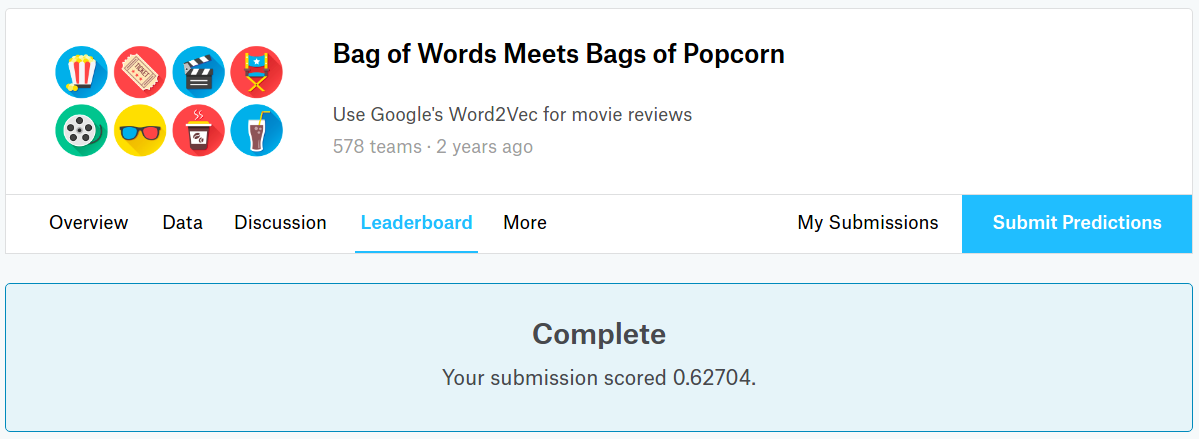

In [114]:
from IPython.display import Image
Image("X1_pred.png")

In [115]:
# Running CV on dataset X2 and getting the best estimator
cvmodel.fit(X2_train , y_train)
cvmodel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [116]:
# Training the above model on X2 and getting ROC-AUC score for our model on the test data
rf_X2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


rf_X2.fit(X2_train , y_train)

roc_auc_score(y_test , rf_X2.predict_proba(X2_t)[:,1])

0.83797953456694341

### Using this model to get predictions on the unlabeled test set for Kaggle submission

In [117]:
# Getting the binary sentiment predictions
test_predict = rf_X2.predict(X2_test)

# Getting the predictions in a format to make submission on Kaggle
final_X2 = pd.DataFrame(data = {"id": test["id"], "sentiment": test_predict})

# Output to CSV
final_X2.to_csv("X2_pred.csv", index=False, quoting=3)

### The X2 model scored 0.75044 on Kaggle.

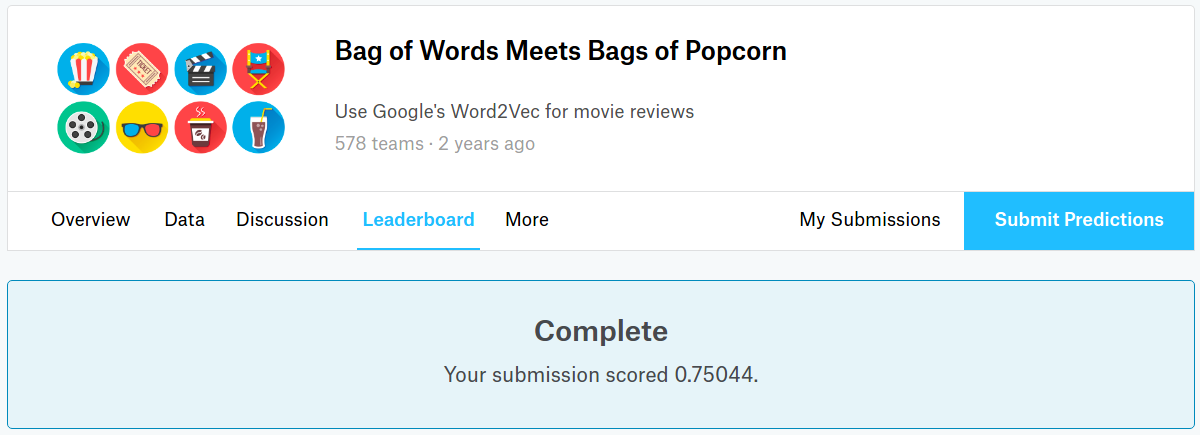

In [118]:
Image("X2_pred.png")

In [121]:
# Running CV on dataset X3 and getting the best estimator
cvmodel.fit(X3_train , y_train)
cvmodel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=110, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [122]:
# Training the above model on X3 and getting ROC-AUC score for our model on the test data
rf_X3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=110, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


rf_X3.fit(X3_train , y_train)

roc_auc_score(y_test , rf_X3.predict_proba(X3_t)[:,1])

0.74653575241767611

### Using this model to get predictions on the unlabeled test set for Kaggle submission

In [123]:
# Getting the binary sentiment predictions
test_predict = rf_X3.predict(X3_test)

# Getting the predictions in a format to make submission on Kaggle
final_X3 = pd.DataFrame(data = {"id": test["id"], "sentiment": test_predict})

# Output to CSV
final_X3.to_csv("X3_pred.csv", index=False, quoting=3)

### The X3 model scored 0.69064 on Kaggle.

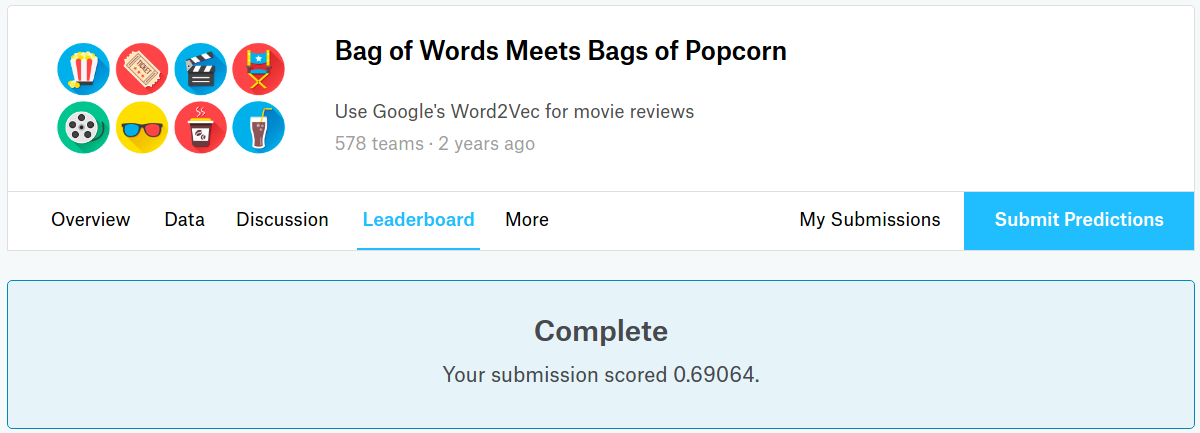

In [124]:
Image("X3_pred.png")

In [125]:
# Running CV on dataset X4 and getting the best estimator
cvmodel.fit(X4_train , y_train)
cvmodel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [126]:
# Training the above model on X4 and getting ROC-AUC score for our model on the test data
rf_X4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


rf_X4.fit(X4_train , y_train)

roc_auc_score(y_test , rf_X4.predict_proba(X4_t)[:,1])

0.84604757643492312

### Using this model to get predictions on the unlabeled test set for Kaggle submission

In [127]:
# Getting the binary sentiment predictions
test_predict = rf_X4.predict(X4_test)

# Getting the predictions in a format to make submission on Kaggle
final_X4 = pd.DataFrame(data = {"id": test["id"], "sentiment": test_predict})

# Output to CSV
final_X4.to_csv("X4_pred.csv", index=False, quoting=3)

### The X4 model scored 0.77164 on Kaggle.

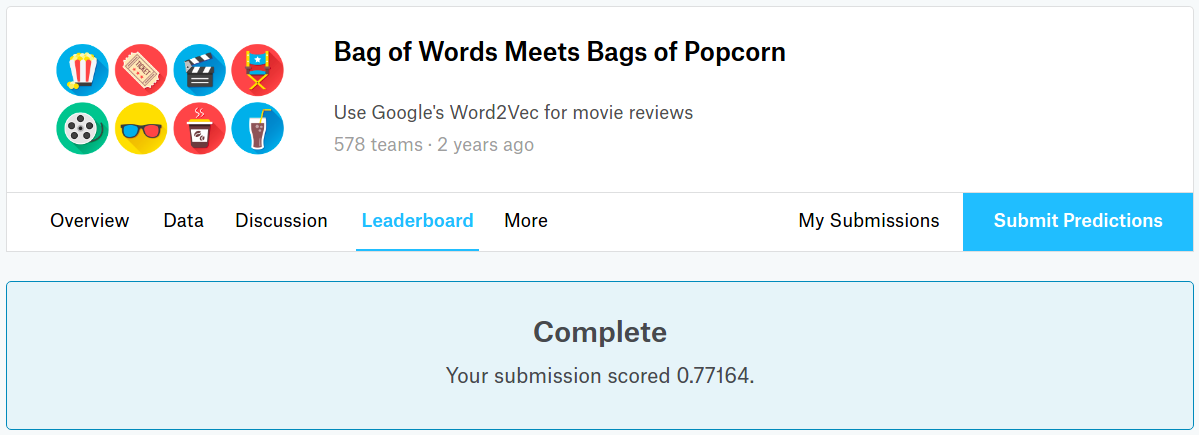

In [128]:
Image("X4_pred.png")

## Plotting ROC curves for each classifier trained on the test set

In [134]:
# Importing metrics needed to plot the curve
from sklearn.metrics import roc_curve, auc

# Creating a function to get ROC-AUC paramters
def auc_plot_param (model, data, response):
    pred = model.predict_proba(data)[:, 1]

    fpr, tpr, threshold = roc_curve(response, pred)
    roc_auc = auc(fpr, tpr)
    
    # Extracting the parameters
    return fpr, tpr, threshold, roc_auc

# Using the function to get plot parameters for all the 4 scenarios
fpr1, tpr1, threshold1, auc1 = auc_plot_param(rf_X1, X1_t, y_test)

fpr2, tpr2, threshold2, auc2 = auc_plot_param(rf_X2, X2_t, y_test)

fpr3, tpr3, threshold3, auc3 = auc_plot_param(rf_X3, X3_t, y_test)

fpr4, tpr4, threshold4, auc4 = auc_plot_param(rf_X4, X4_t, y_test)

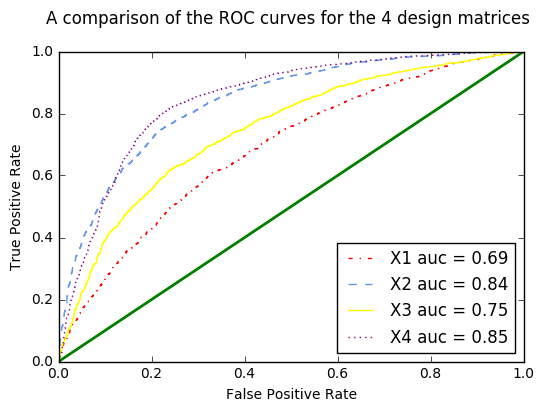

In [143]:
# Plotting the curve
import matplotlib.pyplot as plt
plt.title('A comparison of the ROC curves for the 4 design matrices \n')

# Plotting the lines
plt.plot(fpr1, tpr1, color = 'red', linestyle = "-.", label = 'X1 auc = {0:.2f}'.format(auc1))
plt.plot(fpr2, tpr2, color = 'cornflowerblue', linestyle = "--", label = 'X2 auc = {0:.2f}'.format(auc2))
plt.plot(fpr3, tpr3, color = 'yellow', linestyle = "-", label = 'X3 auc = {0:.2f}'.format(auc3))
plt.plot(fpr4, tpr4, 'purple', linestyle = ":", label = 'X4 auc = {0:.2f}'.format(auc4))
# Making the diagonal
plt.plot([0, 1], [0, 1], 'green', linewidth = 2)

plt.legend(loc = 'lower right')

# Plot axes
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

### From the graph, we can see that models created on design matrices X2 and X4 perform almost the same. X2 is the model created using Google word2vec and X4 is the lda model with 20 topics. X4 comes out at the top with the maximum auc on the split test data and the Kaggle test data.

## Evaluating the different featurization techniques for sentiment classification

The performance of the design matrices X2 and X4 is comparable and a lot better than the other two. Design Matrix X4 performed best in all the metrics. The ROC-AUC for our test data came out to 0.85 and the AUC on Kaggle test data came out as 0.77.

Why X2 performs well is straightforward. The model was trained using Google's word2vec model which has been trained on billions of documents. In comparison, our model that was used for X1 was only trained on a very small dataset compared to that. The Google model was able to learn the context much better because it had already been exposed to a lot of documents.

Why X4 performed better than X3 is not as simple. The explanation there is that our dataset has documents which make a lot more sense if they are classified into 20 categories (or Topics) rather than 10. For X3 we used a total of 10 topics. However we know from experience that even major movie categories like Action, Comedy etc. can be divided into a lot of subcategories like Action-Adventure, Action-Superhero, Action Thriller, Romantic-Comedy etc.  Thus in our case, our LDA model was able to make sense of the words and the documents much better when we created 20 topics instead of 10.

Thus the LDA featurization technique with 20 topics worked best.


Compared to the simple bag of words models that we created in Homework 1, these models have a lower ROC-AUC score. While in theory, they should have performed better because the word2vec model uses a complex neural net model within it's architecture to arrive at the vectorization of the words. It also learns about context using the n-gram approach. Compared to the bag of words model which treats the words as discrete atomic symbols and has a lot of sparcity, the word2vec model is a type of vector space model in which we represent (embed) words in a continuous vector space where semantically similar words are mapped to nearby points. Thus, in essence word2vec is a better featurization technique than bag of words. Why we got a lower ROC-AUC could be due to the classifier we used - SVM in HW1 compared to random forest in HW3. Also, maybe learning context is not as important in prediction of sentiment as is the presence of a specific word. BOW clearly captures negative words like "poor", "worst", "great" etc. and gives us a sentiment analysis based on that. Maybe the complexity of word2vec is not needed to predict sentiment in the case of our movie reviews but just a clear capturing of words. Also, the clustering approach we have used could be highly optimized. It might not be the best approach to make a model too.

The LDA approach is also an improvement over the simple bag of words. It is a generative model that tries to map a document to various topics that it identifies from within the document vocabulary. Thus, in a sense it also captures the sense and context of the text while the bag of words does not. While the way it does that is using a methodology similar to bag of words, it has been proven to be much more effective than the vanilla BOW. An addition to the number of topics will result in a more granular model but it can also result in a loss of generalization. In our case, the BOW performed better in the ROC-AUC metric maybe because of the classifier. Also, maybe division of the topics of our reviews made by the LDA model takes place based on the type of movie or some other metric. These topics might not directly relate to the sentiment of the reviews which is why the BOW might perform better.


Three things that we could do to improve the efficacy of the classifier are:
1. Use a different classifier. Generally, in the case of well normalized data, without missing values, less number of features, a SVM works better than a Random Forest. It is much better in working with non-linear boundaries which should be the case in sentiment analysis. Random Forest works with soft linear boundaries. We also have the Vanilla BOW model giving us a much better prediction AUC when used with a SVM. We could also use an algorithm like XGBoost which is a better ensemble than a random forest.
2. We should optimize the number of topics. As we can see, changing the number of topics from 10 to 20 has considerably improved the performance. We can evaluate what number of topics gives us the best performance, without loss of generality to get the best classifier.
3. We have used a corpus of all the words in our LDA model. We could perform some feature reduction techniques like PCA first to get a combination of words that are most similar to each other so that the LDA has better chance of finding distinct and meaningful topics. Another approach might be to use tf-idf weighting along with LDA to get better a better weighting of the important words.